# SVM ( Forest DataSet ) 

### Problem Statement:
classify the Size_Categorie using SVM  

# ============================================================= 

# 1.  <u>Data Description : 

**month :** month of the year: 'jan' to 'dec'

**day :** day of the week: 'mon' to 'sun'

**FFMC :** FFMC index from the FWI system: 18.7 to 96.20

**DMC :** DMC index from the FWI system: 1.1 to 291.3

**DC :** DC index from the FWI system: 7.9 to 860.6

**ISI	:** ISI index from the FWI system: 0.0 to 56.10

**temp :** temperature in Celsius degrees: 2.2 to 33.30

**RH :** relative humidity in %: 15.0 to 100

**wind :** wind speed in km/h: 0.40 to 9.40

**rain :** utside rain in mm/m2 : 0.0 to 6.4

**Size_Categorie :**	the burned area of the forest ( Small , Large) 

# 2. <u> Import Neccesery Libraries -  

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# 3. <u>Import Warnings -  

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 4.<u>Import Dataset -  

In [5]:
forest_fire = pd.read_csv('forestfires.csv')
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
pd.set_option('max_columns',None)

In [7]:
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


# 5. <u>EDA -  

In [9]:
forest_fire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
forest_fire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [12]:
forest_fire.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [14]:
forest_fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
forest_fire.duplicated().sum()

8

In [65]:
#dropping duplicate rows
forest_fire.drop_duplicates(inplace=True)

In [66]:
forest_fire.duplicated().sum()

0

# 6. <u> Data Visualization -  

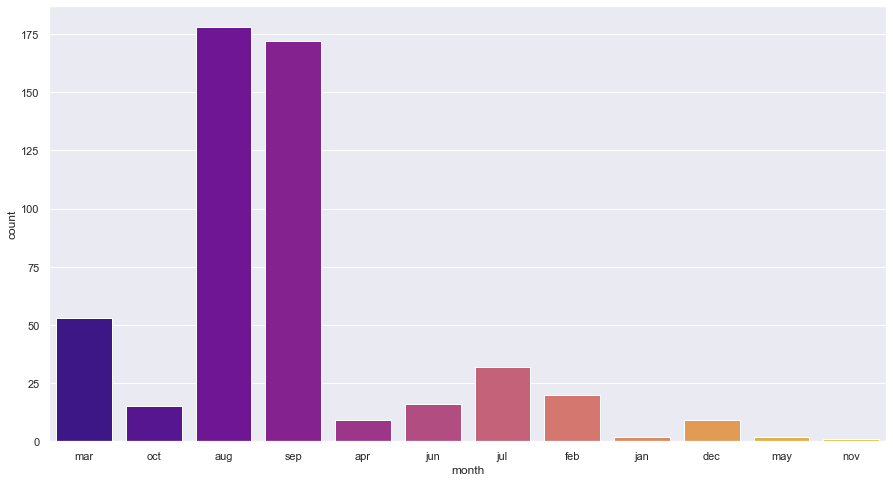

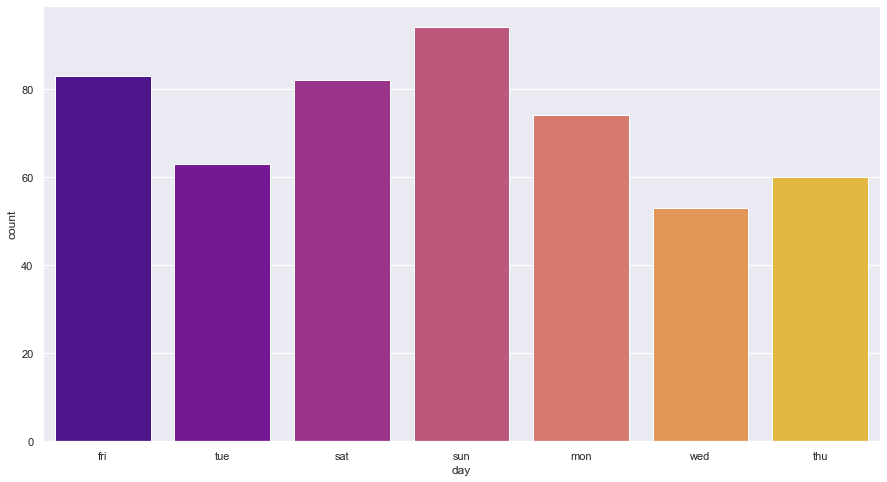

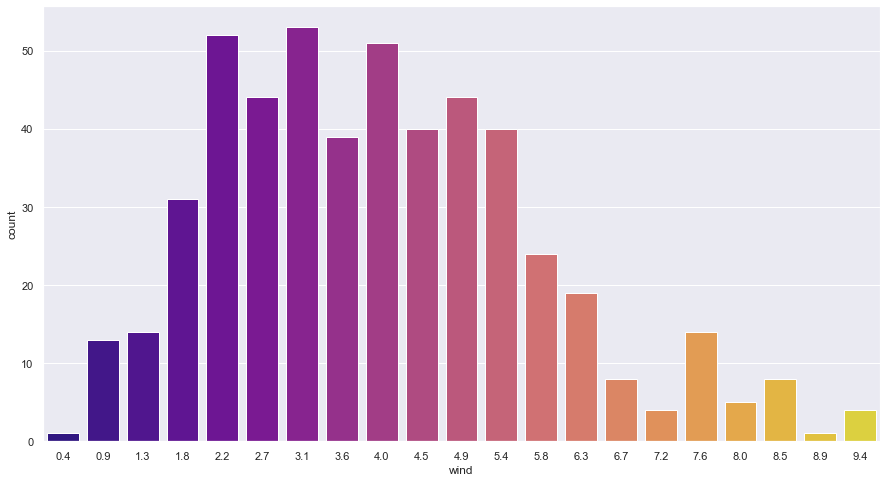

In [67]:
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['month', 'day','wind']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = forest_fire, palette = 'plasma');

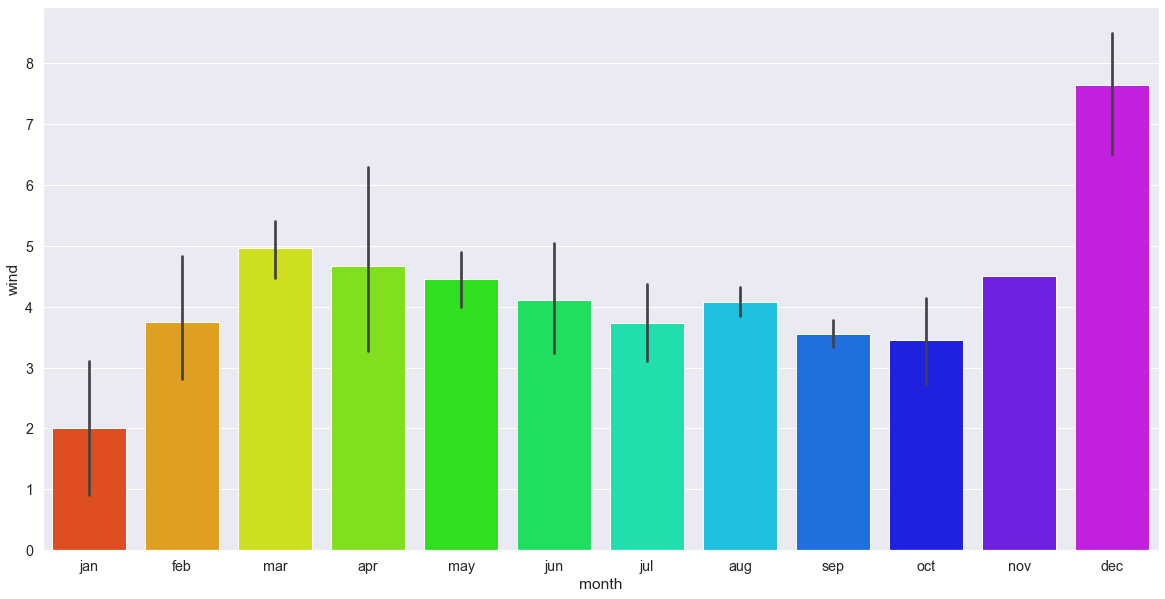

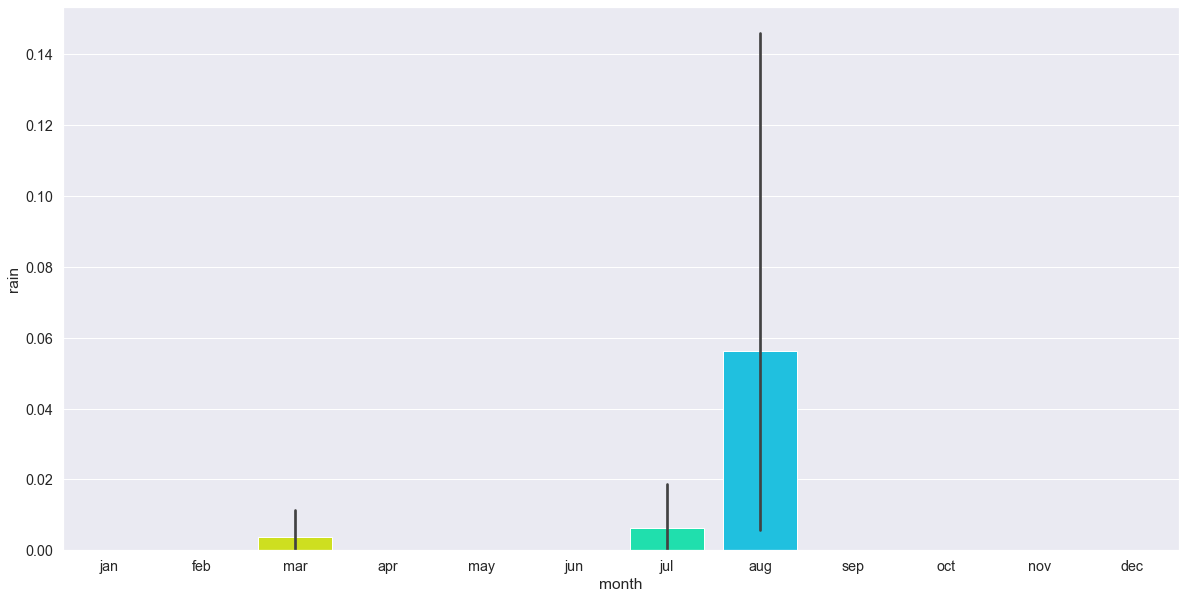

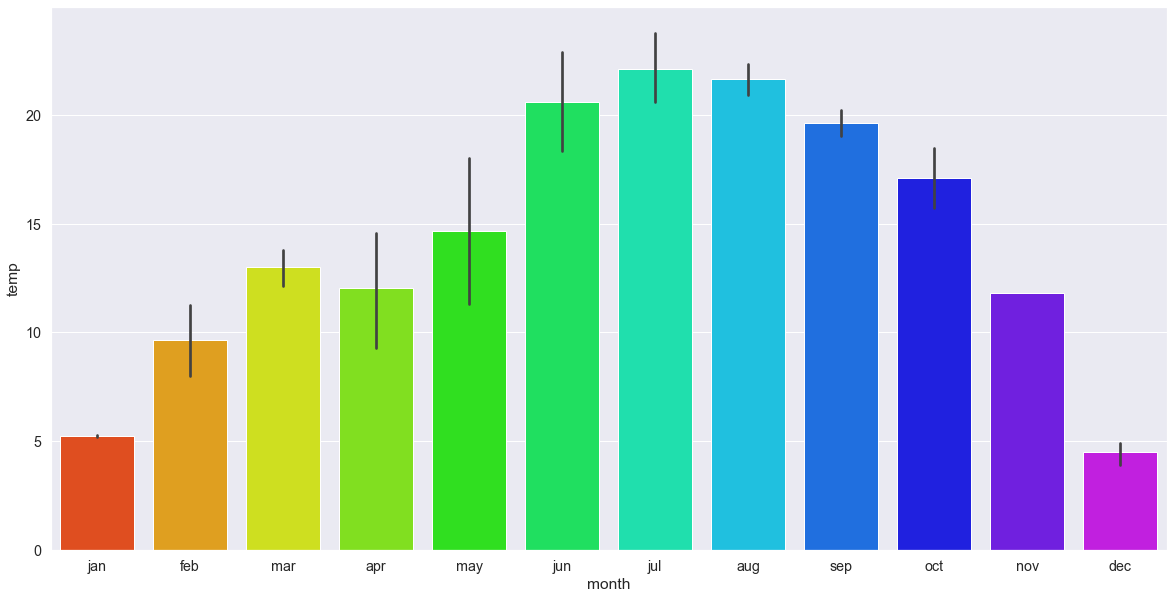

In [68]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
a = ['wind','rain','temp']
for i in a :
    plt.figure()
    month_temp = sns.barplot(x = 'month', y = i, data = forest_fire,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                         palette = 'gist_rainbow');

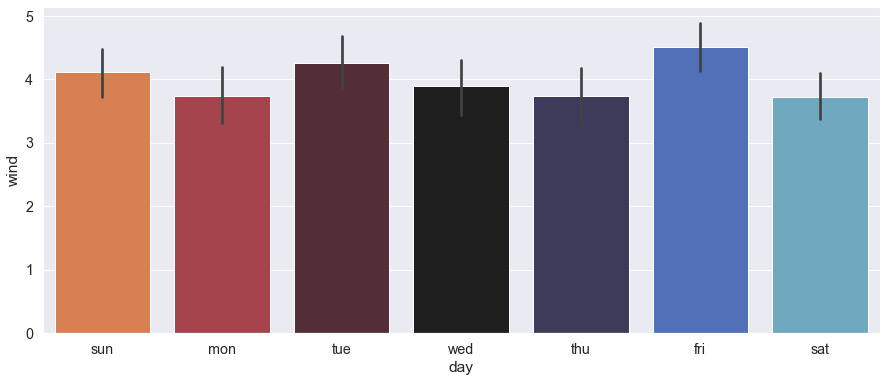

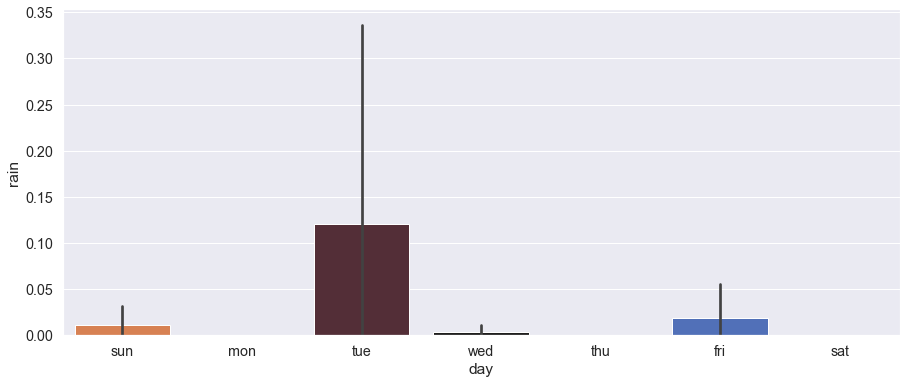

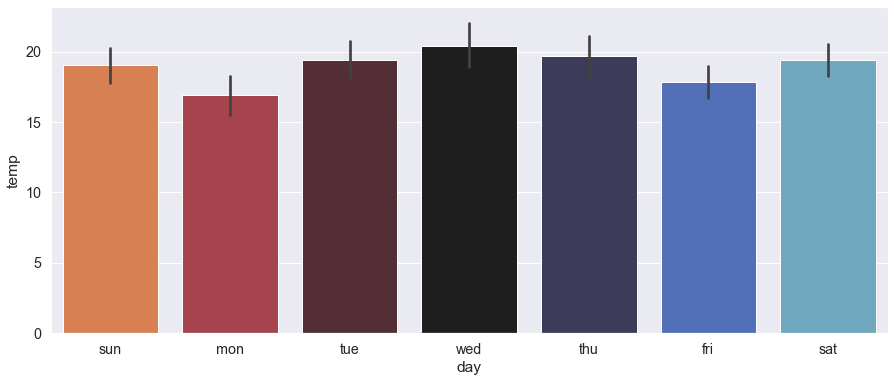

In [69]:
plt.rcParams['figure.figsize'] = [15, 6]
sns.set(style = "darkgrid", font_scale = 1.3)
a = ['wind','rain','temp']
for i in a :
    plt.figure()
    month_temp = sns.barplot(x = 'day', y = i, data = forest_fire,
                         order = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], 
                         palette = 'icefire_r');

# 7. <u> Data Preparation -  

# Encoding 

In [78]:
forest_fire['size_category'].replace({'small':1, 'large':0}, inplace=True)
forest_fire['month'].replace({'jan':1, 'feb':2,'mar':3, 'apr':4,'may':5, 'jun':6,'jul':7, 'aug':8,'sep':9, 'oct':10,'nov':11, 
                       'dec':12}, inplace=True)
forest_fire['day'].replace({'sun':1, 'mon':2,'tue':3,'wed':4, 'thu':5,'fri':6, 'sat':7}, inplace=True)
forest_fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [79]:
x = forest_fire.drop('size_category',axis=1)
y = forest_fire[['size_category']]

## Splitting into train and test 

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
print('shape_x_train :',x_train.shape, '\nshape_y_train',y_train.shape)
print('shape_x_test :',x_test.shape, '\nshape_y_test',y_test.shape)


shape_x_train : (407, 30) 
shape_y_train (407, 1)
shape_x_test : (102, 30) 
shape_y_test (102, 1)


# 8. <u> Model Building & Model Training - 

# Linear 

In [82]:
model_linear1 = SVC(kernel = "linear")
model_linear1.fit(x_train,y_train)

SVC(kernel='linear')

In [84]:
from sklearn import metrics
pred_test_linear1 = model_linear1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear1)*100)

Accuracy: 95.09803921568627


In [85]:
#SVC classifier
clf=SVC()
param_grid=[{'kernel':['linear'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2],
                          'kernel': ['linear']}])

In [86]:
gsv.best_params_,gsv.best_score_

({'C': 0.01, 'gamma': 50, 'kernel': 'linear'}, 0.9877439024390243)

so buid the model with c= 0.01 and Kernel=linear, gamma = 50 as it gives best accuracy 

In [87]:
clf = SVC(C= 0.01,kernel="linear", gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 96.07843137254902


In [88]:
confusion_matrix(y_test, y_pred)

array([[26,  3],
       [ 1, 72]], dtype=int64)

# RBF 

In [89]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [90]:
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf)*100)

Accuracy: 78.43137254901961


In [91]:
#SVC classifier
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['rbf']}])

In [92]:
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7371341463414633)

so buid the model with c= 1000 and kernel=rbf gamma = 0.5 as it gives best accuracy 

In [93]:
clf = SVC(C= 1000,kernel="rbf", gamma = 0.5)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 72.54901960784314


In [94]:
confusion_matrix(y_test, y_pred)

array([[ 1, 28],
       [ 0, 73]], dtype=int64)

# Poly 

In [95]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [96]:
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly)*100)

Accuracy: 79.41176470588235


In [97]:
#SVC classifier
clf=SVC()
param_grid=[{'kernel':['poly'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['poly']}])

In [98]:
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'poly'}, 0.9608536585365852)

In [99]:
clf = SVC(C= 1000,kernel="poly", gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 96.07843137254902


In [100]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 0, 73]], dtype=int64)

# CONCLUSION 

The Linear model gives the best accuracy of 96.07% with C = 0.01 and kernel=linear, gamma = 50 